In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
*VERIFIER S'IL EXISTE DE VALEURS MANQUANTES($NaN$)*

In [3]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

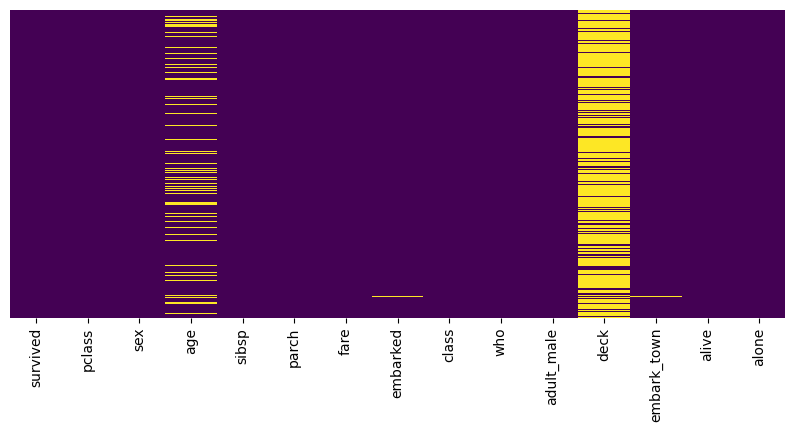

In [4]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.isnull(), cmap= "viridis", cbar = False, yticklabels = False)
plt.show()

---
$REMPLACER$ LES VALEURS MANQUANTES($NaN$) par la *$MOYENNE$* et par la mediane *$MEDIANE$*

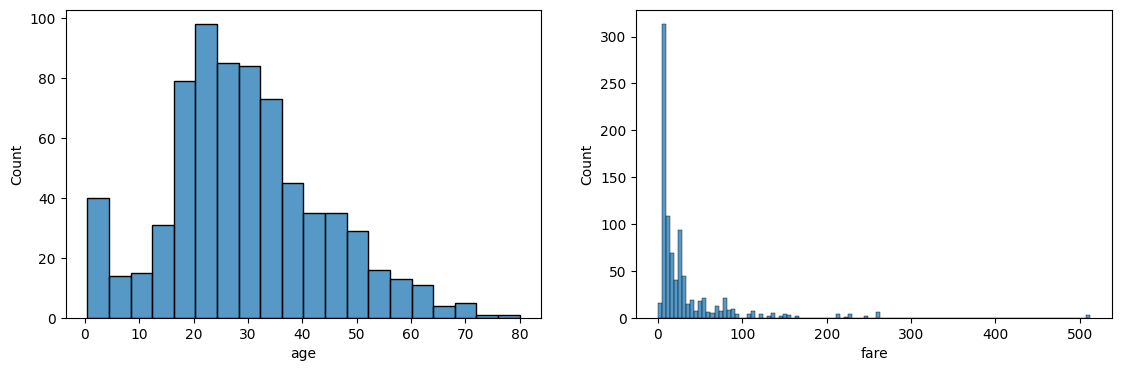

In [5]:
plt.figure(figsize=(13.5, 4))
for col in enumerate(df.select_dtypes(include = ['float64'])):
    plt.subplot(1, 2, col[0] + 1)
    sns.histplot(x = col[1], data = df)
plt.show() 

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


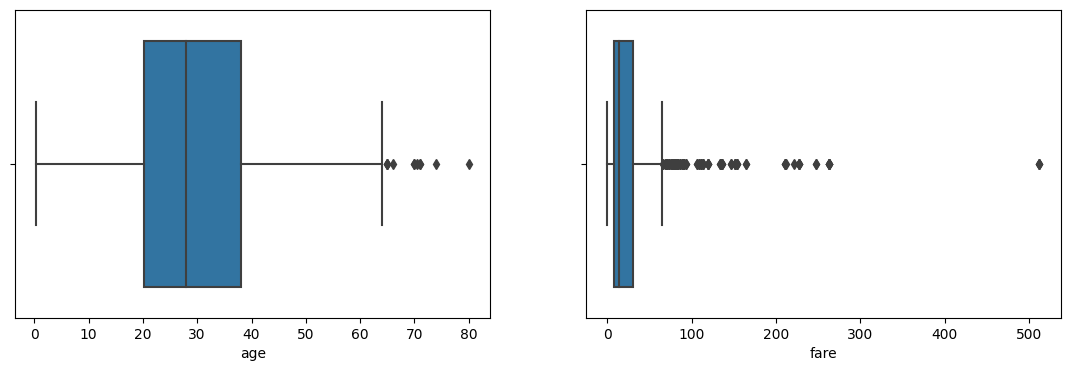

In [7]:
plt.figure(figsize=(13.5, 4))
for col in enumerate(df.select_dtypes(include = ['float64'])):
    plt.subplot(1, 2, col[0] + 1)
    sns.boxplot(x = col[1], data = df)
plt.show() 

In [9]:
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [ ]:
# 

In [ ]:
# features = ['age', 'fare']

# for feature in features:
#     if feature == 'age':
#         df[feature] = df[feature].fillna(df[feature].mean())
#     else:
#         df[feature] = df[feature].fillna(df[feature].median())

# df[features].isnull().sum()


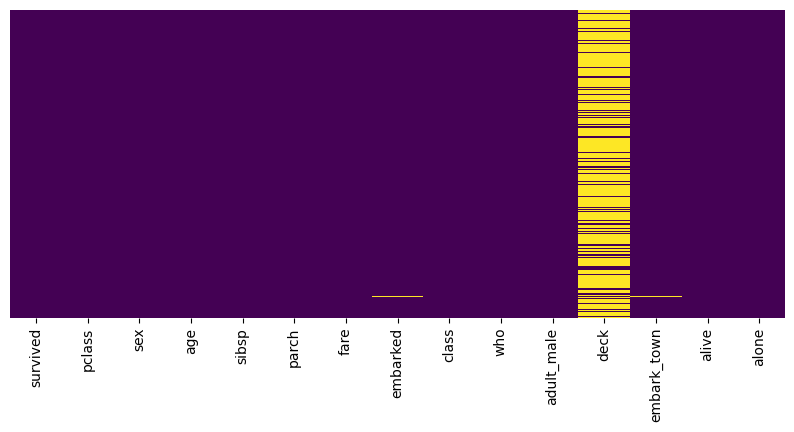

In [10]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.isnull(), cmap= "viridis", cbar = False, yticklabels = False)
plt.show()

In [11]:
del df['embark_town']

In [12]:
df.dropna(subset = ['embarked'], inplace = True)

---
$REMPLACER$ LES VALEURS MANQUANTES($NaN$) pour les variables qualitatives par le *$MODE$* 

In [18]:
df['deck'].value_counts()

C    747
B     45
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [14]:
df['deck'].value_counts().max()

59

In [15]:
df['deck'].value_counts().index[0]


'C'

In [16]:
df['deck'] = df['deck'].fillna(df['deck'].value_counts().index[0])

# for feature in features:
#     df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

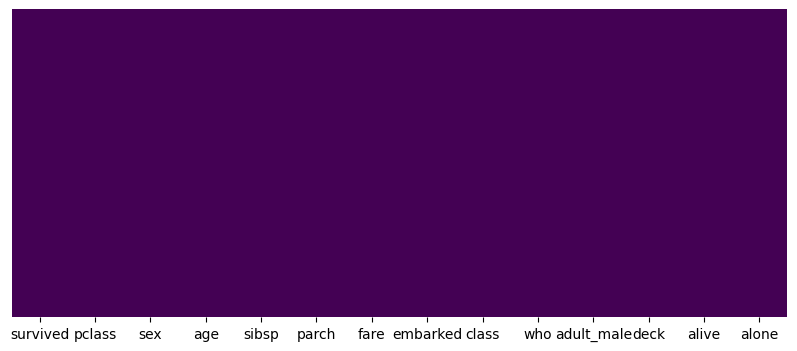

In [17]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.isnull(), cmap = "viridis", cbar = False, yticklabels = False)
plt.show()

Exercice a faire: 
- Remplacer les NaNs par la moyenne, median et most_frequent en utilisant le transformer SimpleImputer de scikit learn disponible depuis le package impute(from sklearn.impute import SimpleImputer) avec titanic dataset